<a href="https://colab.research.google.com/github/Manjunathsharma66/K-Manjunath/blob/main/MillingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyswarms as ps
from pyswarms.utils.plotters import (plot_cost_history)
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('milling1.csv')


In [ ]:
data

,no,Spindle speed (rpm),Feedrate,Feed per tooth (mm/tooth),Cutting depth (mm),Clamping torque of vise (N-m),Accumulated removed volume per cutter (mm3),Avg_Ra
0,1,3000,240,0.02,0.5,18,0.0,0.468
1,2,2000,400,0.05,0.5,18,1.2,0.402
2,3,1000,320,0.08,0.5,18,3.2,0.346
3,4,3000,240,0.02,0.7,18,4.8,0.634
4,5,2000,400,0.05,0.7,18,6.5,0.590
...,...,...,...,...,...,...,...,...
148,149,2000,400,0.05,1.0,18,61.4,1.236
149,150,2100,420,0.05,1.0,18,65.4,1.140
150,151,1900,532,0.07,1.0,18,69.6,1.096
151,152,2000,560,0.07,1.0,18,74.9,1.135


In [ ]:
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense , TimeDistributed, Activation
import tensorflow as tf


In [ ]:
col_names = list(data.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
df_1 = mm_scaler.fit_transform(data)

df = pd.DataFrame(df_1, columns = col_names)

In [ ]:
sine_values = []
steps = 1
input_width = 5

x = []
y = []

for i in range(0, df.shape[0], steps):
  sine_values.append(df.at[i, 'Avg_Ra'])

for i in range(0, len(sine_values) - input_width, steps):
  x.append(sine_values[i: i+input_width])
  y.append(sine_values[i + input_width])

x = np.reshape(x,[-1, input_width,1])
y = np.reshape(y,[-1,1])

In [ ]:
trainX , testX, trainY, testY = train_test_split(x,y,test_size = 0.2, shuffle =False)

In [ ]:
model  = Sequential()
model.add(LSTM(16, return_sequences = False , input_shape=(None, 1)))
model.add(Dense(1,activation='linear'))

def root_mean_squared_error_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.math.squared_difference(y_true, y_pred)))

def r_square_loss(y_true,y_pred):
  from keras import backend as K
  SS_res = K.sum(K.square(y_true - y_pred))
  SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
  return 1 - (1-SS_res/(SS_tot + K.epsilon()))

In [ ]:
model.compile(loss = root_mean_squared_error_loss , optimizer = 'sgd' , metrics=[root_mean_squared_error_loss,r_square_loss])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1152      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyNN = model.fit(trainX, trainY, batch_size = 50 , epochs = 100 , validation_split = 0.1)

Epoch 1/100
3/3 [==============================] - 3s 263ms/step - loss: 0.4640 - root_mean_squared_error_loss: 0.4494 - r_square_loss: 4.2733 - val_loss: 0.6487 - val_root_mean_squared_error_loss: 0.6487 - val_r_square_loss: 16.0319
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.4028 - root_mean_squared_error_loss: 0.3789 - r_square_loss: 3.4143 - val_loss: 0.5821 - val_root_mean_squared_error_loss: 0.5821 - val_r_square_loss: 12.9100
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3513 - root_mean_squared_error_loss: 0.3265 - r_square_loss: 2.2023 - val_loss: 0.5235 - val_root_mean_squared_error_loss: 0.5235 - val_r_square_loss: 10.4391
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3047 - root_mean_squared_error_loss: 0.2639 - r_square_loss: 2.0424 - val_loss: 0.4662 - val_root_mean_squared_error_loss: 0.4662 - val_r_square_loss: 8.2801
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - lo

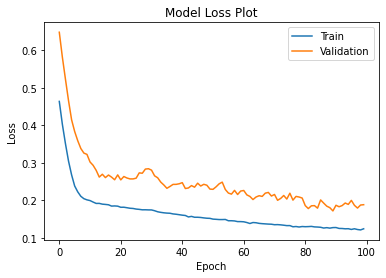

In [ ]:
plt.plot(historyNN.history['loss'])
plt.plot(historyNN.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.show()


In [ ]:
lossNN = model.evaluate(testX , testY)

1/1 [==============================] - 0s 22ms/step - loss: 0.1594 - root_mean_squared_error_loss: 0.1594 - r_square_loss: 0.7135


In [ ]:
print('loss output for test data is: %f' % lossNN[0])

loss output for test data is: 0.159444


In [ ]:
predictY = model.predict(testX)


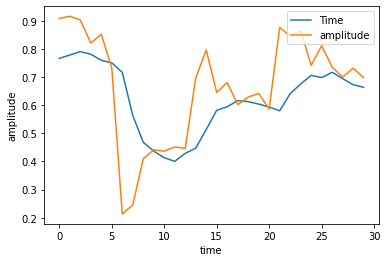

In [ ]:
time = np.arange(predictY.shape[0])

plt.plot(time,predictY,testY)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend(['Time','amplitude'],loc = 'upper right')

plt.show()


In [ ]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface

mode1 = Sequential()
mode1.add(LSTM(9,return_sequences=False,input_shape = (None,1), name = 'layer_1'))
mode1.add(Dense(1, activation='linear',name = 'layer_2'))
options = {'c1':0.5, 'c2':0.5,'w':0.6}


In [ ]:
layer_1 = mode1.get_layer('layer_1').get_weights()
layer_2 = mode1.get_layer('layer_2').get_weights()

dimensions=((layer_1[0].shape[0])* (layer_1[0].shape[1])) + ((layer_1[0].shape[0])*(layer_1[0].shape[1]))+((layer_1[1].shape[0])*(layer_1[1].shape[1]))
print("number of neuralnetwork paramters %d" % dimensions)

number of neuralnetwork paramters 396


2021-10-13 06:50:20,131 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.6}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=36.2
2021-10-13 06:50:20,903 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 36.18531367483097, best pos: [ 0.24090818  0.42590413  0.27794612  0.22819181  0.04313599  0.08229531
  0.26770307  0.03259556 -0.35253122 -0.01181141 -0.12799318  0.21987847
  0.14231524 -0.03156091  0.04429416  0.4866527   0.16833371 -0.09392857
  0.26575359  0.02418158  0.46031368  0.26559061 -0.05398467  0.22086833
 -0.03627511  0.32195862  0.25690484  0.07638783 -0.12599144  0.26114566
  0.56008684  0.26530489  0.3362877   0.39874019  0.50358569  0.23660989
 -0.11173336  0.57755953  0.11433377 -0.04411772  0.50953056 -0.01562029
 -0.04002522  0.3062497   0.33420375  0.27829651  0.22424719  0.63643957
  0.08175002  0.51210644  0.29210152  0.08186437  0.46223603  0.31763875
  0.28494192  0.4008217

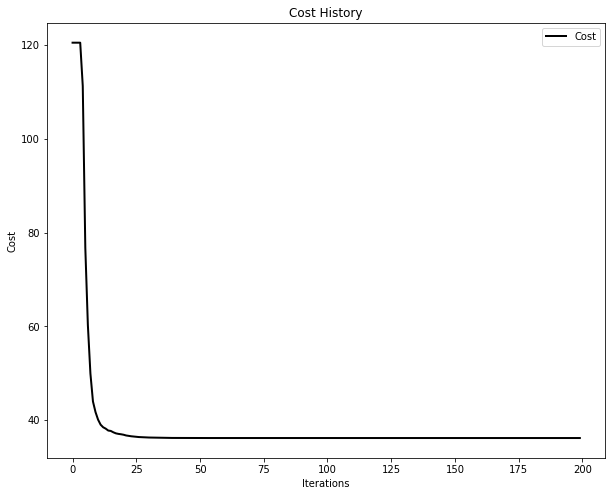

In [ ]:
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=dimensions, options=options)
cost,pos= optimizer.optimize(fx.sphere, iters=200)
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()

In [ ]:
pip install pyswarms


     |████████████████████████████████| 104 kB 5.1 MB/s 


2021-10-13 05:10:41,324 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=7.85e-12
2021-10-13 05:10:41,589 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.85397740195621e-12, best pos: [ 2.47883973e-06  1.06895066e-07 -1.04015704e-06  7.76973564e-07
  1.10859628e-07]


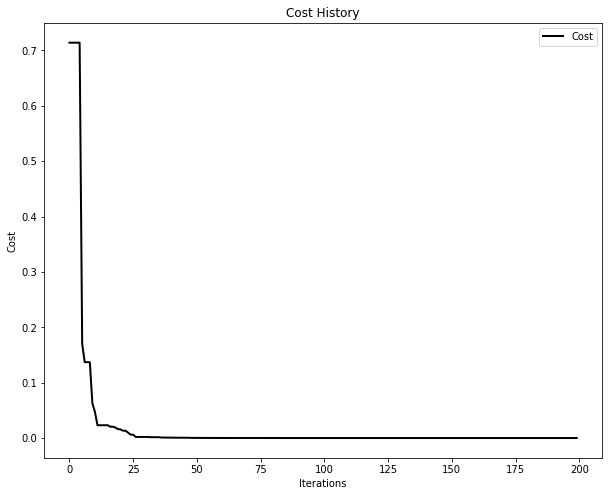

In [ ]:
optimizer.optimize(fx.sphere, iters=100)
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()